In [1]:
pip install datasets

     ---------------------------------------- 0.0/57.6 kB ? eta -:--:--
     --------------------- ------------------ 30.7/57.6 kB 1.3 MB/s eta 0:00:01
     -------------------------------------- 57.6/57.6 kB 751.8 kB/s eta 0:00:00
   ---------------------------------------- 0.0/472.7 kB ? eta -:--:--
   ------- -------------------------------- 92.2/472.7 kB 5.1 MB/s eta 0:00:01
   ------------------- -------------------- 225.3/472.7 kB 2.3 MB/s eta 0:00:01
   ------------------------ --------------- 286.7/472.7 kB 2.0 MB/s eta 0:00:01
   ---------------------------------------- 472.7/472.7 kB 3.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/447.4 kB ? eta -:--:--
   ---------------------------------------- 447.4/447.4 kB 9.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/143.5 kB ? eta -:--:--
   ---------------------------------------- 143.5/143.5 kB 8.9 MB/s eta 0:00:00
   ---------------------------------------- 0.0/116.3 kB ? eta -:--:--
   --

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
conda-repo-cli 1.0.75 requires requests_mock, which is not installed.
conda-repo-cli 1.0.75 requires clyent==1.2.1, but you have clyent 1.2.2 which is incompatible.
conda-repo-cli 1.0.75 requires requests==2.31.0, but you have requests 2.32.3 which is incompatible.


In [2]:
from datasets import load_dataset
dataset = load_dataset("Senem/Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data")
print(dataset['train'])

README.md:   0%|          | 0.00/978 [00:00<?, ?B/s]

C:\Users\jon29\anaconda3\Lib\site-packages\huggingface_hub\file_download.py:139: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\jon29\.cache\huggingface\hub\datasets--Senem--Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


(…)nt_Analysis_of_YouTube_Comments_Data.csv:   0%|          | 0.00/219k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/1500 [00:00<?, ? examples/s]

Dataset({
    features: ['sentiment', 'comment'],
    num_rows: 1500
})


In [3]:
import pandas as pd

# 將數據集轉換為 DataFrame 格式
df = pd.DataFrame(dataset['train'])

# 查看數據集的前幾行
print(df.head())

       sentiment                                            comment
0  not nostalgia  He was a singer with a golden voice that I lov...
1      nostalgia  The mist beautiful voice ever I listened to hi...
2      nostalgia  I have most of Mr. Reeves songs.  Always love ...
3  not nostalgia  30 day leave from 1st tour in Viet Nam to conv...
4      nostalgia  listening to his songs reminds me of my mum wh...


In [4]:
print("數據集大小:", df.shape)
print("數據集特徵:", df.columns.tolist())
print("數據集示例:")
print(df.head())

數據集大小: (1500, 2)
數據集特徵: ['sentiment', 'comment']
數據集示例:
       sentiment                                            comment
0  not nostalgia  He was a singer with a golden voice that I lov...
1      nostalgia  The mist beautiful voice ever I listened to hi...
2      nostalgia  I have most of Mr. Reeves songs.  Always love ...
3  not nostalgia  30 day leave from 1st tour in Viet Nam to conv...
4      nostalgia  listening to his songs reminds me of my mum wh...


In [ ]:
#資料準備

In [5]:
# 確認數據類型
print(df.dtypes)

# 清理數據：將評論轉換為小寫，去除多餘的空格
df['comment'] = df['comment'].str.lower().str.strip()

# 確認清理結果
print(df.head())

sentiment    object
comment      object
dtype: object
       sentiment                                            comment
0  not nostalgia  he was a singer with a golden voice that i lov...
1      nostalgia  the mist beautiful voice ever i listened to hi...
2      nostalgia  i have most of mr. reeves songs.  always love ...
3  not nostalgia  30 day leave from 1st tour in viet nam to conv...
4      nostalgia  listening to his songs reminds me of my mum wh...


In [6]:
# 查看數據集的基本信息
print(df.info())
print(df.describe())
print("前五條記錄:")
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  1500 non-null   object
 1   comment    1500 non-null   object
dtypes: object(2)
memory usage: 23.6+ KB
None
            sentiment                                            comment
count            1500                                               1500
unique              2                                               1499
top     not nostalgia  never heard this song before... wow what an am...
freq              750                                                  2
前五條記錄:
       sentiment                                            comment
0  not nostalgia  he was a singer with a golden voice that i lov...
1      nostalgia  the mist beautiful voice ever i listened to hi...
2      nostalgia  i have most of mr. reeves songs.  always love ...
3  not nostalgia  30 day leave from 1st tour in 

In [ ]:
#Data Mining using Pandas

In [7]:
# 檢查缺失值
print("缺失值檢查:")
print(df.isnull().sum())

# 如果有缺失值，刪除缺失行
df = df.dropna()


缺失值檢查:
sentiment    0
comment      0
dtype: int64


In [8]:
# 檢查重複行
print("重複行數量:", df.duplicated().sum())

# 刪除重複行
df = df.drop_duplicates()

重複行數量: 1


In [ ]:
#Data Preprocessing

In [9]:
sample_df = df.sample(500, random_state=42)

In [10]:
# 計算字符數和單詞數
df['char_count'] = df['comment'].apply(len)
df['word_count'] = df['comment'].apply(lambda x: len(x.split()))

In [11]:
# 只保留相關的特徵
selected_features = ['sentiment', 'comment', 'char_count', 'word_count']
df = df[selected_features]

In [12]:
from sklearn.preprocessing import MinMaxScaler

# 對字符數和單詞數進行標準化
scaler = MinMaxScaler()
df[['char_count', 'word_count']] = scaler.fit_transform(df[['char_count', 'word_count']])

In [13]:
from sklearn.decomposition import PCA

# 使用 PCA 降維至 2 維
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df[['char_count', 'word_count']])

In [14]:
from sklearn.preprocessing import LabelBinarizer

# 將情感標籤進行二值化
lb = LabelBinarizer()
df['sentiment_binary'] = lb.fit_transform(df['sentiment'])

In [ ]:
#Data Exploration

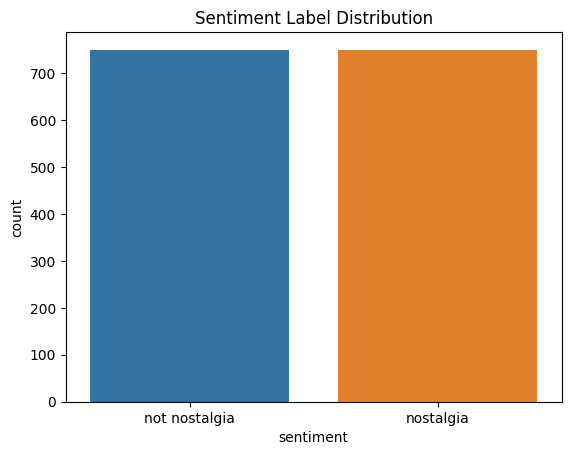

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# 情感標籤分佈
sns.countplot(x='sentiment', data=df)
plt.title("Sentiment Label Distribution")
plt.show()

In [ ]:
#Data Classification

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

# 分割數據集
X_train, X_test, y_train, y_test = train_test_split(df['comment'], df['sentiment_binary'], test_size=0.2, random_state=42)

# TF-IDF 特徵
tfidf = TfidfVectorizer()
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# 訓練 Naive Bayes 模型
nb = MultinomialNB()
nb.fit(X_train_tfidf, y_train)

# 模型評估
y_pred = nb.predict(X_test_tfidf)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.92      0.86       158
           1       0.90      0.74      0.81       142

    accuracy                           0.84       300
   macro avg       0.85      0.83      0.83       300
weighted avg       0.84      0.84      0.83       300



In [18]:
!pip install wordcloud

   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   - -------------------------------------- 10.2/300.2 kB ? eta -:--:--
   ----- --------------------------------- 41.0/300.2 kB 495.5 kB/s eta 0:00:01
   ----------------- ---------------------- 133.1/300.2 kB 1.1 MB/s eta 0:00:01
   ------------------------------------ --- 276.5/300.2 kB 1.7 MB/s eta 0:00:01
   ---------------------------------------- 300.2/300.2 kB 1.6 MB/s eta 0:00:00


C:\Users\jon29\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


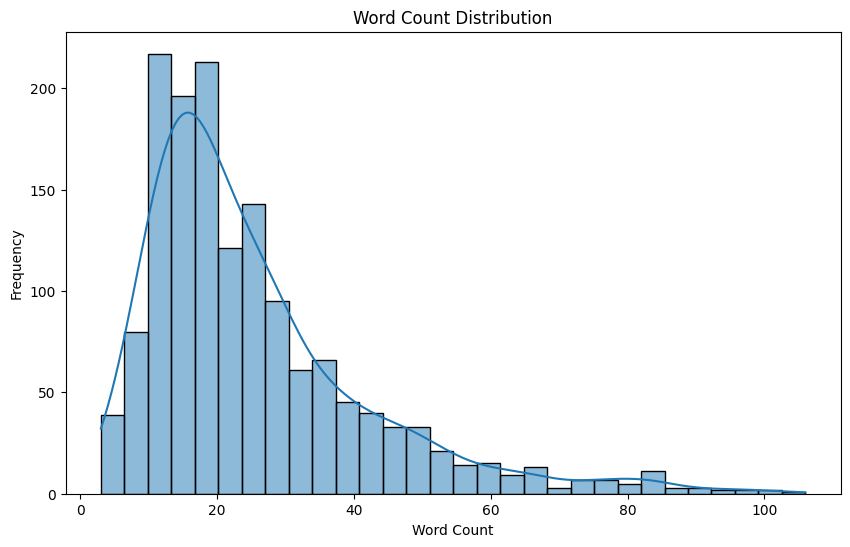

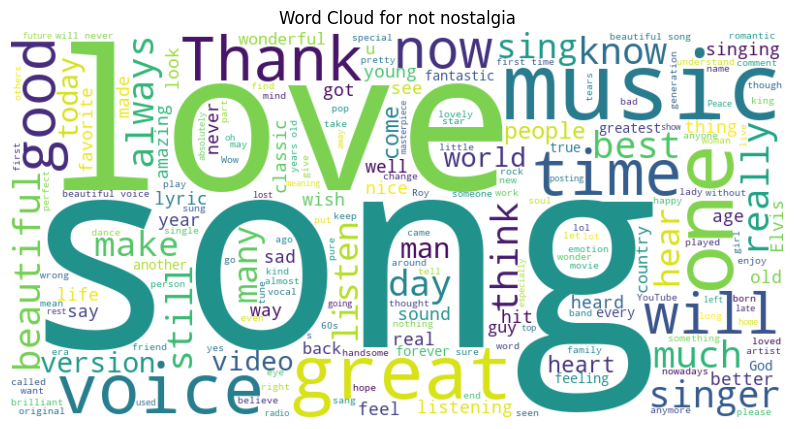

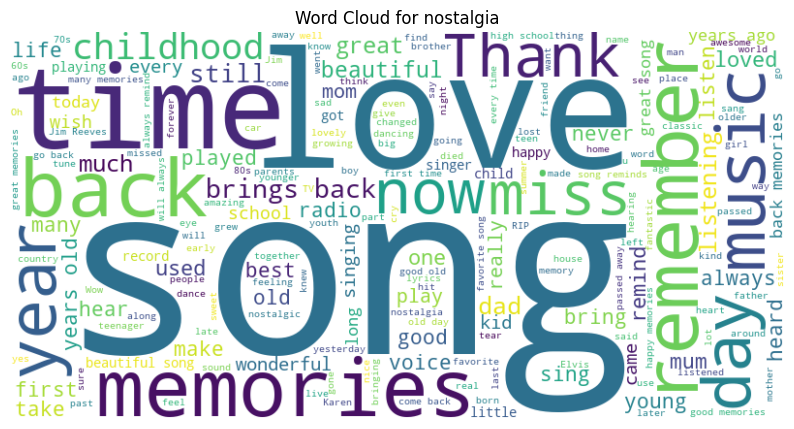

MultinomialNB with CountVectorizer:
               precision    recall  f1-score   support

    nostalgia       0.78      0.95      0.86       152
not nostalgia       0.94      0.72      0.81       148

     accuracy                           0.84       300
    macro avg       0.86      0.84      0.83       300
 weighted avg       0.86      0.84      0.83       300

ComplementNB with TfidfVectorizer:
               precision    recall  f1-score   support

    nostalgia       0.77      0.96      0.85       152
not nostalgia       0.95      0.70      0.81       148

     accuracy                           0.83       300
    macro avg       0.86      0.83      0.83       300
 weighted avg       0.86      0.83      0.83       300



In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB, ComplementNB
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# 讀取數據
df = pd.DataFrame(dataset['train'])

# 計算單詞數量並可視化
df['word_count'] = df['comment'].apply(lambda x: len(x.split()))
plt.figure(figsize=(10, 6))
sns.histplot(df['word_count'], bins=30, kde=True)
plt.title('Word Count Distribution')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.show()

# 根據情感標籤生成詞雲
for sentiment in df['sentiment'].unique():
    text = ' '.join(df[df['sentiment'] == sentiment]['comment'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for {sentiment}')
    plt.axis('off')
    plt.show()

# 拆分數據
X_train, X_test, y_train, y_test = train_test_split(df['comment'], df['sentiment'], test_size=0.2, random_state=42)

# 建立 CountVectorizer 和 TfidfVectorizer 特徵
count_vectorizer = CountVectorizer()
tfidf_vectorizer = TfidfVectorizer()

X_train_count = count_vectorizer.fit_transform(X_train)
X_test_count = count_vectorizer.transform(X_test)

X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# MultinomialNB （適合詞頻特徵）
nb_count = MultinomialNB()
nb_count.fit(X_train_count, y_train)
y_pred_count = nb_count.predict(X_test_count)
print("MultinomialNB with CountVectorizer:")
print(classification_report(y_test, y_pred_count))

# ComplementNB （適合 TF-IDF 特徵）
nb_tfidf = ComplementNB()
nb_tfidf.fit(X_train_tfidf, y_train)
y_pred_tfidf = nb_tfidf.predict(X_test_tfidf)
print("ComplementNB with TfidfVectorizer:")
print(classification_report(y_test, y_pred_tfidf))


In [24]:
print("CountVectorizer 與 TF-IDF 的影響：TF-IDF 通過降低高頻詞的權重，強化了某些不常見但重要的詞語，對 nostalgia 類別尤其有效，使得模型在該類別的召回率有所提升。")
print("模型選擇：如果目標是更高的整體準確性並且重視 nostalgia 類別的完整識別，ComplementNB 與 TF-IDF 特徵可能更適合；但如果更重視平衡表現且略微偏向 not nostalgia 類別，MultinomialNB 與 CountVectorizer 會更合適。")

CountVectorizer 與 TF-IDF 的影響：TF-IDF 通過降低高頻詞的權重，強化了某些不常見但重要的詞語，對 nostalgia 類別尤其有效，使得模型在該類別的召回率有所提升。
模型選擇：如果目標是更高的整體準確性並且重視 nostalgia 類別的完整識別，ComplementNB 與 TF-IDF 特徵可能更適合；但如果更重視平衡表現且略微偏向 not nostalgia 類別，MultinomialNB 與 CountVectorizer 會更合適。


In [ ]:
# 4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficentparts you noticed? How can you improve the Data preprocessing for these specific datasets? This part is worth 10% of your grade

In [27]:
text = """
數據處理優化：

1. 停用詞處理：目前，模型的特徵集可能包含了一些高頻且無意義的詞（如 "the"、"is" 等），這些詞不利於情感分類。可以在 CountVectorizer 和 TF-IDF 中直接去掉這些停用詞，讓模型更專注於具有辨識度的詞語，減少無用維度。

2. 文本清理：增加對文本的清理，比如去除特殊符號、還原縮寫（如將 "can't" 還原為 "cannot"）。這樣可以讓詞語更一致，提高模型的表現。這部分可以在預處理時用正則表達式來實現。

3. 加入雙詞組特徵：考慮增加雙詞組（bigrams）特徵。對於情感分類，一些詞的組合可能比單詞更有區分性，比如 “good old” 在 nostalgia 中可能出現頻率更高。這樣可以幫助模型捕捉到一些關鍵的情感搭配。

4. 類別平衡：檢查數據中 `nostalgia` 和 `not nostalgia` 的樣本數量是否均衡。若不平衡，可以考慮下采樣或上采樣來平衡數據，以防止模型過度偏向樣本多的類別。

5. 自定義情感詞庫：針對情感分析，可以考慮建立一些自定義詞庫，加入特定情感的詞或詞組，幫助模型更準確地抓取某些情感特徵，比如“懷舊”可能包含一些具體的年份、音樂或人物的詞語。

"""

print(text)



數據處理優化：

1. 停用詞處理：目前，模型的特徵集可能包含了一些高頻且無意義的詞（如 "the"、"is" 等），這些詞不利於情感分類。可以在 CountVectorizer 和 TF-IDF 中直接去掉這些停用詞，讓模型更專注於具有辨識度的詞語，減少無用維度。

2. 文本清理：增加對文本的清理，比如去除特殊符號、還原縮寫（如將 "can't" 還原為 "cannot"）。這樣可以讓詞語更一致，提高模型的表現。這部分可以在預處理時用正則表達式來實現。

3. 加入雙詞組特徵：考慮增加雙詞組（bigrams）特徵。對於情感分類，一些詞的組合可能比單詞更有區分性，比如 “good old” 在 nostalgia 中可能出現頻率更高。這樣可以幫助模型捕捉到一些關鍵的情感搭配。

4. 類別平衡：檢查數據中 `nostalgia` 和 `not nostalgia` 的樣本數量是否均衡。若不平衡，可以考慮下采樣或上采樣來平衡數據，以防止模型過度偏向樣本多的類別。

5. 自定義情感詞庫：針對情感分析，可以考慮建立一些自定義詞庫，加入特定情感的詞或詞組，幫助模型更準確地抓取某些情感特徵，比如“懷舊”可能包含一些具體的年份、音樂或人物的詞語。


